# <h1><center>BÀI THỰC HÀNH VỀ NHÀ: HIỆU CHỈNH CAMERA SỬ DỤNG OPENCV (CAMERA CALIBRATION)</center></h1>

## Nội dung cần thực hiện
- Điền vào phần code bỏ trống
- Thử nghiệm với ảnh Cam21 và Cam51 (phần ảnh đã được crop)
- Lấy hệ số có được thử nghiệm với dữ liệu gốc Cam2 và Cam5
- Gửi code và kết quả thử nghiệm

In [2]:
# Các thư viện cần thiết
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
import math

## Hiển thị ảnh bàn cờ khi trước khi được căn chỉnh

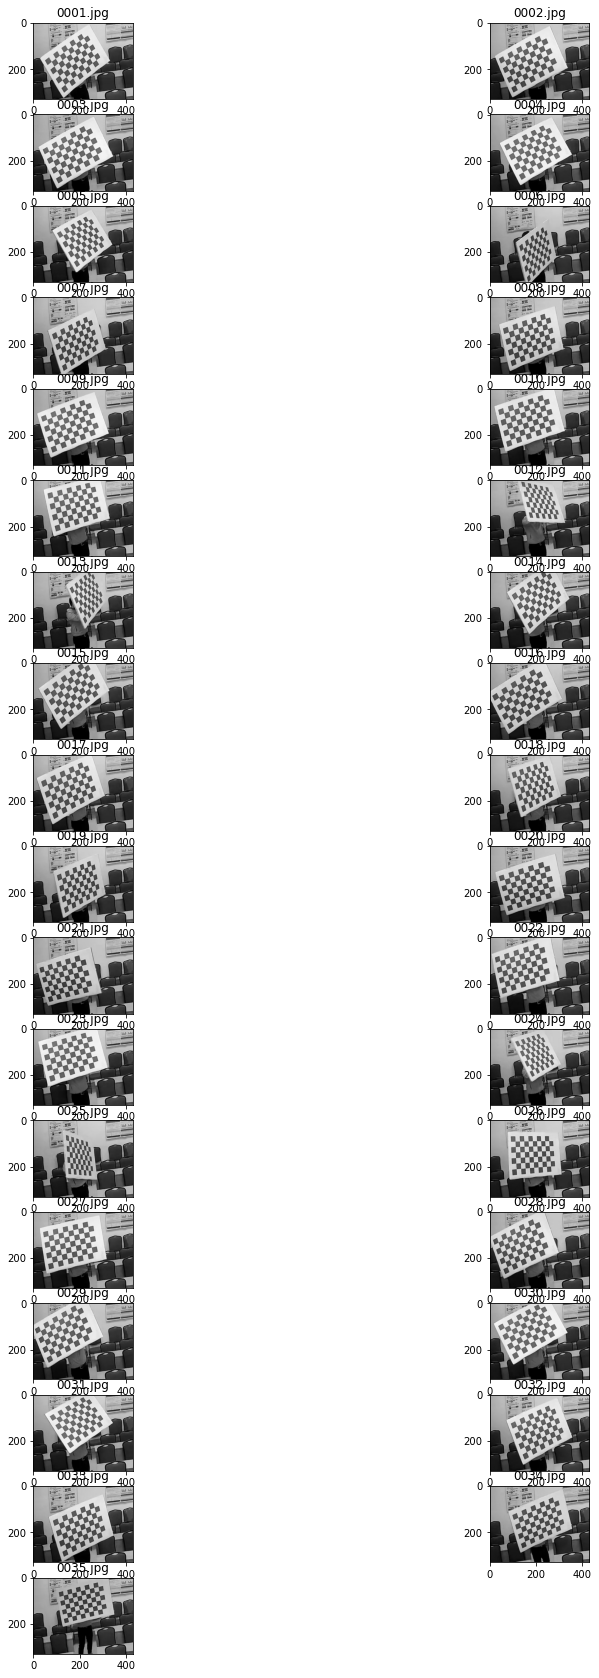

In [3]:
# Sử dụng dữ liệu của Cam2
images=glob.glob('Cam21/*.jpg')
column=2
row=int(math.ceil(len(images)/column))
column, row
plt.figure(figsize=(15,30))
for i,fname in enumerate(images):
    img=cv2.imread(fname)
    plt.subplot(row,column,i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(os.path.basename(fname))

In [6]:
# termination criteria
################Your code here (1)########################
criteria = None
########################################################

In [7]:
################Your code here (2)########################
cbrow = None
cbcolumn = None
########################################################

In [8]:
# Chuẩn bị object points giống như: (0,0,0), (1,0,0), ...., (10,6,0)
objp = np.zeros((cbrow*cbcolumn, 3), np.float32)
################Your code here (3) ########################
objp[:, :2] = None
########################################################
objp, objp.shape

(array([[0., 0., 0.],
        [1., 0., 0.],
        [2., 0., 0.],
        [3., 0., 0.],
        [4., 0., 0.],
        [5., 0., 0.],
        [6., 0., 0.],
        [7., 0., 0.],
        [8., 0., 0.],
        [0., 1., 0.],
        [1., 1., 0.],
        [2., 1., 0.],
        [3., 1., 0.],
        [4., 1., 0.],
        [5., 1., 0.],
        [6., 1., 0.],
        [7., 1., 0.],
        [8., 1., 0.],
        [0., 2., 0.],
        [1., 2., 0.],
        [2., 2., 0.],
        [3., 2., 0.],
        [4., 2., 0.],
        [5., 2., 0.],
        [6., 2., 0.],
        [7., 2., 0.],
        [8., 2., 0.],
        [0., 3., 0.],
        [1., 3., 0.],
        [2., 3., 0.],
        [3., 3., 0.],
        [4., 3., 0.],
        [5., 3., 0.],
        [6., 3., 0.],
        [7., 3., 0.],
        [8., 3., 0.],
        [0., 4., 0.],
        [1., 4., 0.],
        [2., 4., 0.],
        [3., 4., 0.],
        [4., 4., 0.],
        [5., 4., 0.],
        [6., 4., 0.],
        [7., 4., 0.],
        [8., 4., 0.],
        [0

In [9]:
# Mảng đề lưu object points và image points từ toàn bộ các ảnh đảm bảo 2 mảng này có cùng kích thước
objpoints = []  # lưu trữ tọa độ 3d trong không gian thế giới thực (3d point in real world space)
imgpoints = []   # Lưu tọa độ 2D trên ảnh (2d point in image plane)

In [27]:
# Lấy toàn bộ ảnh trong folder
images = glob.glob("Cam51/*.jpg")
i = 0
for fname in images:
    i = i + 1
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Tìm góc của bàn cờ (find the chessboard corners)
    #######################Your code here (4)######################
    ret, corners = None
    #################################################################
    # Nếu tìm thấy, thêm vào các điểm của đối tượng, điểm của ảnh (sau khi tinh chỉnh) (if found, add object points, image points (after refining them))
    if ret == True:
        #######################You code here (5)##################################
        corners2 = None
        #######################################################################
        imgpoints.append(corners2)
        objpoints.append(objp)
        # Vẽ và hiển thị các góc (Draw and display the corners)
        img = cv2.drawChessboardCorners(img, (cbrow, cbcolumn), corners2, ret)
        cv2.imshow('Image', img)
        cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
##### Hiệu chỉnh (CALIBRATION) ######
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
    objpoints, imgpoints, gray.shape[::-1], None, None, flags=cv2.CALIB_RATIONAL_MODEL)
dist = np.array(dist)

## UNDISTORTION

In [29]:
##### UNDISTORTION #####
img1 = cv2.imread("Cam51/0001.jpg")
h, w = img1.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(
    mtx, dist, (w, h), 1, (w, h))
# print(type(newcameramtx))
resultImg = glob.glob("Cam51/*.jpg")
for rimg in resultImg:
    img = cv2.imread(rimg)
    
    #################Your code here(6)####################################
    mapx, mapy = None
    dst = None
    ###################################################################
    
    # Ghi ảnh kết quả
    path = "Cam51/result/Calibresult_" + \
        os.path.basename(rimg)
    cv2.imwrite(path, dst)

# Lỗi phép chiếu (re-projection error)
mean_error = 0
for i in range(len(objpoints)):
    #####################Your code here (7)###################################
    imgpoints2, _ = None
    ####################################################################
    # Điền code vào đây (8)
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error
print("total error", mean_error/len(objpoints))


[[9.79180725e+02 0.00000000e+00 3.42200114e+02]
 [0.00000000e+00 1.02933618e+03 3.09611404e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
total error 0.3329045038395073


In [25]:
images=glob.glob('Cam2_orgin/result/*.png')
column=2
row=int(math.ceil(len(images)/column))
column, row
plt.figure(figsize=(15,30))
for i,fname in enumerate(images):
    img=cv2.imread(fname)
    plt.subplot(row,column,i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(os.path.basename(fname))

<Figure size 1080x2160 with 0 Axes>